# 作業 : (Kaggle)房價預測

# [作業目標]

試著模仿範例寫法, 在房價預測中, 觀察去除離群值的影響

# [作業重點]

觀察將極端值以上下限值取代, 對於分布與迴歸分數的影響 (In[5], Out[5])
<br>觀察將極端值資料直接刪除, 對於分布與迴歸分數的影響 (In[6], Out[6])

In [21]:
# 做完特徵工程前的所有準備 (與前範例相同)
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
df_train=pd.read_csv(r'D:\GitHub\3rd-ML100Days\homework\data\house_train.csv.gz')
train_Y=np.log1p(df_train['SalePrice'])
df=df_train.drop(['Id','SalePrice'],axis=1)
df.head()



,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [22]:
num_features=[]
for dtype,feature in zip(df.dtypes,df.columns):
    if dtype=='float64' or dtype=='int64':
        num_features.append(feature)
print(f'{len(num_features)} Numeric features:{num_features}')
df=df[num_features]
df=df.fillna(-1)
MMEncoder=MinMaxScaler()
df.head()
import seaborn as sns
import matplotlib.pyplot as plt

36 Numeric features:['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


# 作業一

試著限制 '1樓地板面積(平方英尺)' (1stFlrSF) 欄位的上下限, 看看能否再進一步提高分數?

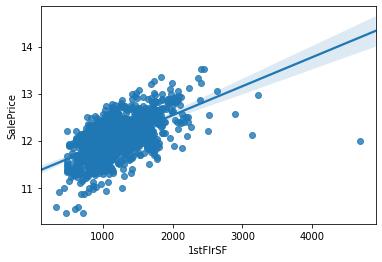

0.8499683837163878

In [16]:
#原始資料回歸
sns.regplot(x=df['1stFlrSF'],y=train_Y)
plt.show()
train_X=MMEncoder.fit_transform(df)
estimator=LinearRegression()
cross_val_score(estimator,train_X,train_Y,cv=5).mean()

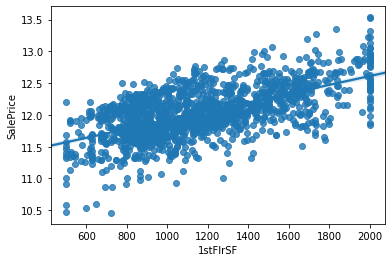

0.876580486010791

In [17]:

df['1stFlrSF'] = df['1stFlrSF'].clip(500, 2000)
sns.regplot(x = df['1stFlrSF'], y=train_Y)
plt.show()

train_X = MMEncoder.fit_transform(df)
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()


# 作業二

續前題, 去除離群值有兩類方式 : 捨棄離群值(刪除離群的資料) 以及調整離群值,
<br>請試著用同樣的上下限, 改為 '捨棄離群值' 的方法, 看看結果會變好還是變差? 並試著解釋原因。

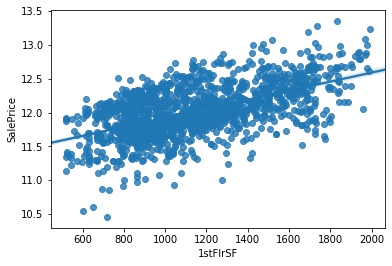

0.8854993000354359

In [18]:
keep_indexs = (df['1stFlrSF']> 500) & (df['1stFlrSF']< 2000)
df = df[keep_indexs]
train_Y = train_Y[keep_indexs]
sns.regplot(x = df['1stFlrSF'], y=train_Y)
plt.show()
train_X = MMEncoder.fit_transform(df)
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

準確率有明顯上升,因為減少了離群值造成的偏差,資料整體的準確率自然會上升